In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

In [2]:
df= pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='sex', ylabel='age'>

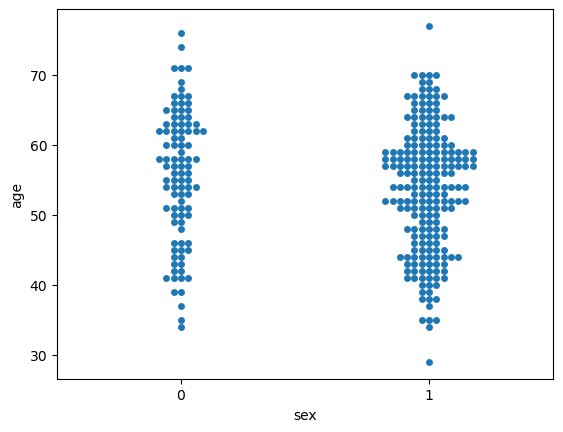

In [8]:
sns.swarmplot(x= df['sex'], y= df['age'])

<Axes: xlabel='sex', ylabel='count'>

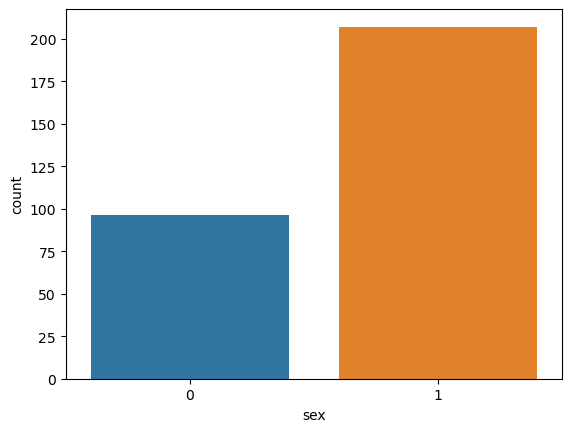

In [9]:
sns.countplot(x= df['sex'])

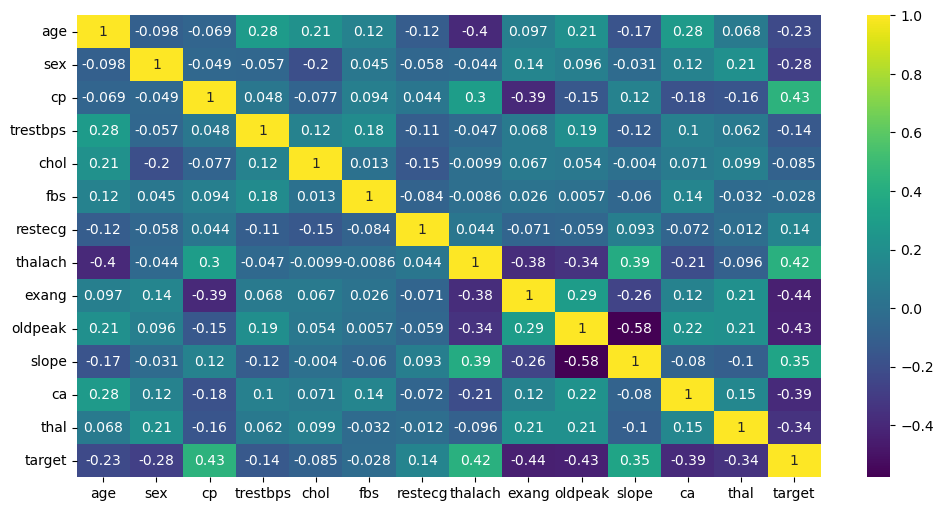

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap= 'viridis', annot= True)
plt.show()

In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

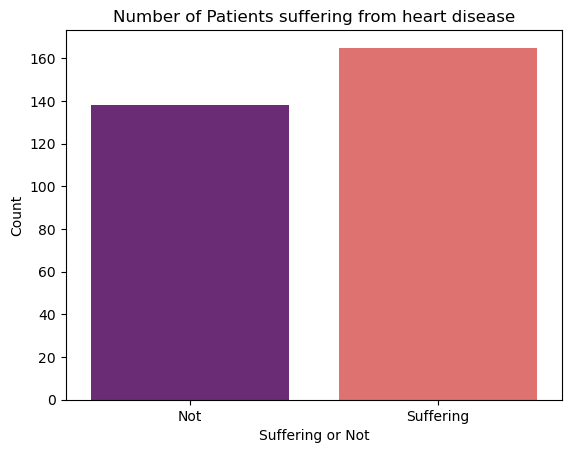

In [12]:
sns.countplot(x=df['target'], palette= 'magma')
#sns.color_palette('mako', as_cmap= True)
plt.title('Number of Patients suffering from heart disease')
plt.xlabel('Suffering or Not')
plt.ylabel('Count')
plt.xticks([0,1],['Not', 'Suffering'])
plt.show()

<Axes: xlabel='target', ylabel='age'>

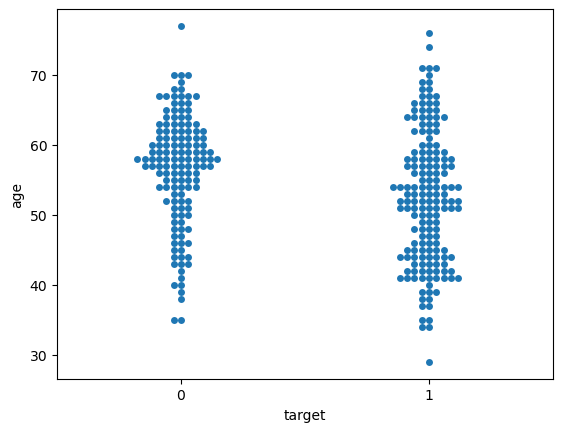

In [13]:
sns.swarmplot(x= df['target'], y= df['age'])

<Axes: xlabel='age', ylabel='Count'>

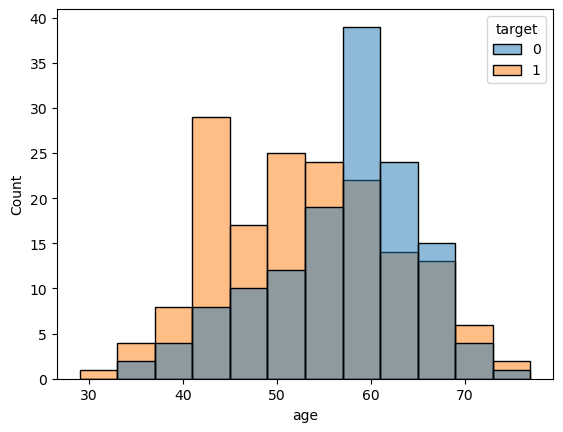

In [14]:
sns.histplot(x= df['age'], hue= df['target'])

<Axes: xlabel='target', ylabel='age'>

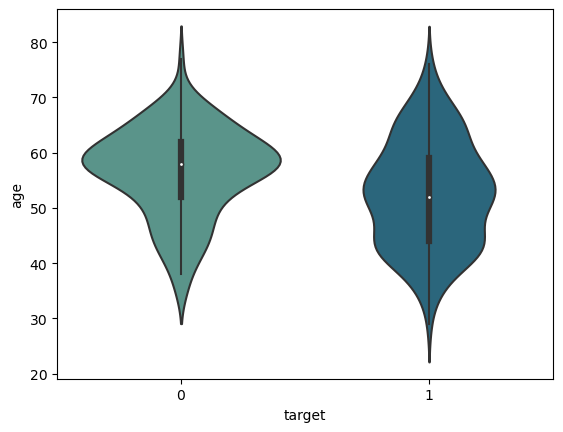

In [15]:
sns.violinplot(x=df['target'], y= df['age'], palette= 'crest')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [17]:
x= df.drop(['target'], axis=1)
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,j) for j in range(len(x.columns))]
vif

,Features,VIF
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trestbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalach,42.742178
8,exang,2.022527
9,oldpeak,3.062890


In [18]:
df.drop(['trestbps'], axis=1, inplace= True)

In [19]:
x= df.drop(['target'], axis=1)
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,j) for j in range(len(x.columns))]
vif

,Features,VIF
0,age,28.599796
1,sex,3.522376
2,cp,2.403644
3,chol,25.923434
4,fbs,1.250256
5,restecg,2.058206
6,thalach,34.026519
7,exang,1.990878
8,oldpeak,2.973430
9,slope,10.067190


In [20]:
df.drop(['thalach'], axis=1, inplace= True)

In [21]:
x= df.drop(['target'], axis=1)
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,j) for j in range(len(x.columns))]
vif

,Features,VIF
0,age,27.213596
1,sex,3.412645
2,cp,2.264790
3,chol,22.374105
4,fbs,1.248307
5,restecg,2.022210
6,exang,1.955987
7,oldpeak,2.965697
8,slope,8.372679
9,ca,1.760648


In [22]:
df.drop(['age'], axis=1, inplace= True)

In [23]:
x= df.drop(['target'], axis=1)
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,j) for j in range(len(x.columns))]
vif

,Features,VIF
0,sex,3.404301
1,cp,2.211674
2,chol,14.917083
3,fbs,1.232428
4,restecg,2.006017
5,exang,1.947640
6,oldpeak,2.827322
7,slope,7.983150
8,ca,1.710828
9,thal,14.860553


In [24]:
df.drop(['chol'], axis=1, inplace= True)

In [25]:
x= df.drop(['target'], axis=1)
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,j) for j in range(len(x.columns))]
vif

,Features,VIF
0,sex,3.348022
1,cp,2.154649
2,fbs,1.223893
3,restecg,2.005247
4,exang,1.915642
5,oldpeak,2.628953
6,slope,6.201591
7,ca,1.707658
8,thal,10.478889


In [26]:
df.drop(['thal'], axis=1, inplace= True)

In [27]:
x= df.drop(['target'], axis=1)
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,j) for j in range(len(x.columns))]
vif

,Features,VIF
0,sex,3.038525
1,cp,2.112149
2,fbs,1.222870
3,restecg,1.957971
4,exang,1.795800
5,oldpeak,2.062440
6,slope,3.756703
7,ca,1.686170


In [28]:
df_ind= list(vif.Features)

In [29]:
df_ind= df[df_ind]

In [30]:
df_ind

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,1,3,1,0,0,2.3,0,0
1,1,2,0,1,0,3.5,0,0
2,0,1,0,0,0,1.4,2,0
3,1,1,0,1,0,0.8,2,0
4,0,0,0,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0
299,1,3,0,1,0,1.2,1,0
300,1,0,1,1,0,3.4,1,2
301,1,0,0,1,1,1.2,1,1


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df_ind, df['target'], test_size= 0.3, random_state=6)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred= lr.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accuracy_score(y_test,y_pred)

0.8351648351648352

In [38]:
confusion_matrix(y_test,y_pred)

array([[34, 10],
       [ 5, 42]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [44]:
pd.DataFrame(np.c_[y_test,y_pred], columns= ['Acutal', 'Predicted'])

,Acutal,Predicted
0,0,1
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
86,0,0
87,0,0
88,0,0
89,0,0


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.7032967032967034

In [49]:
confusion_matrix(y_test,y_pred_dt)

array([[34, 10],
       [17, 30]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        44
           1       0.75      0.64      0.69        47

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.71      0.70      0.70        91



In [58]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.7802197802197802
[[35  9]
 [11 36]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        44
           1       0.80      0.77      0.78        47

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [56]:
from sklearn import tree

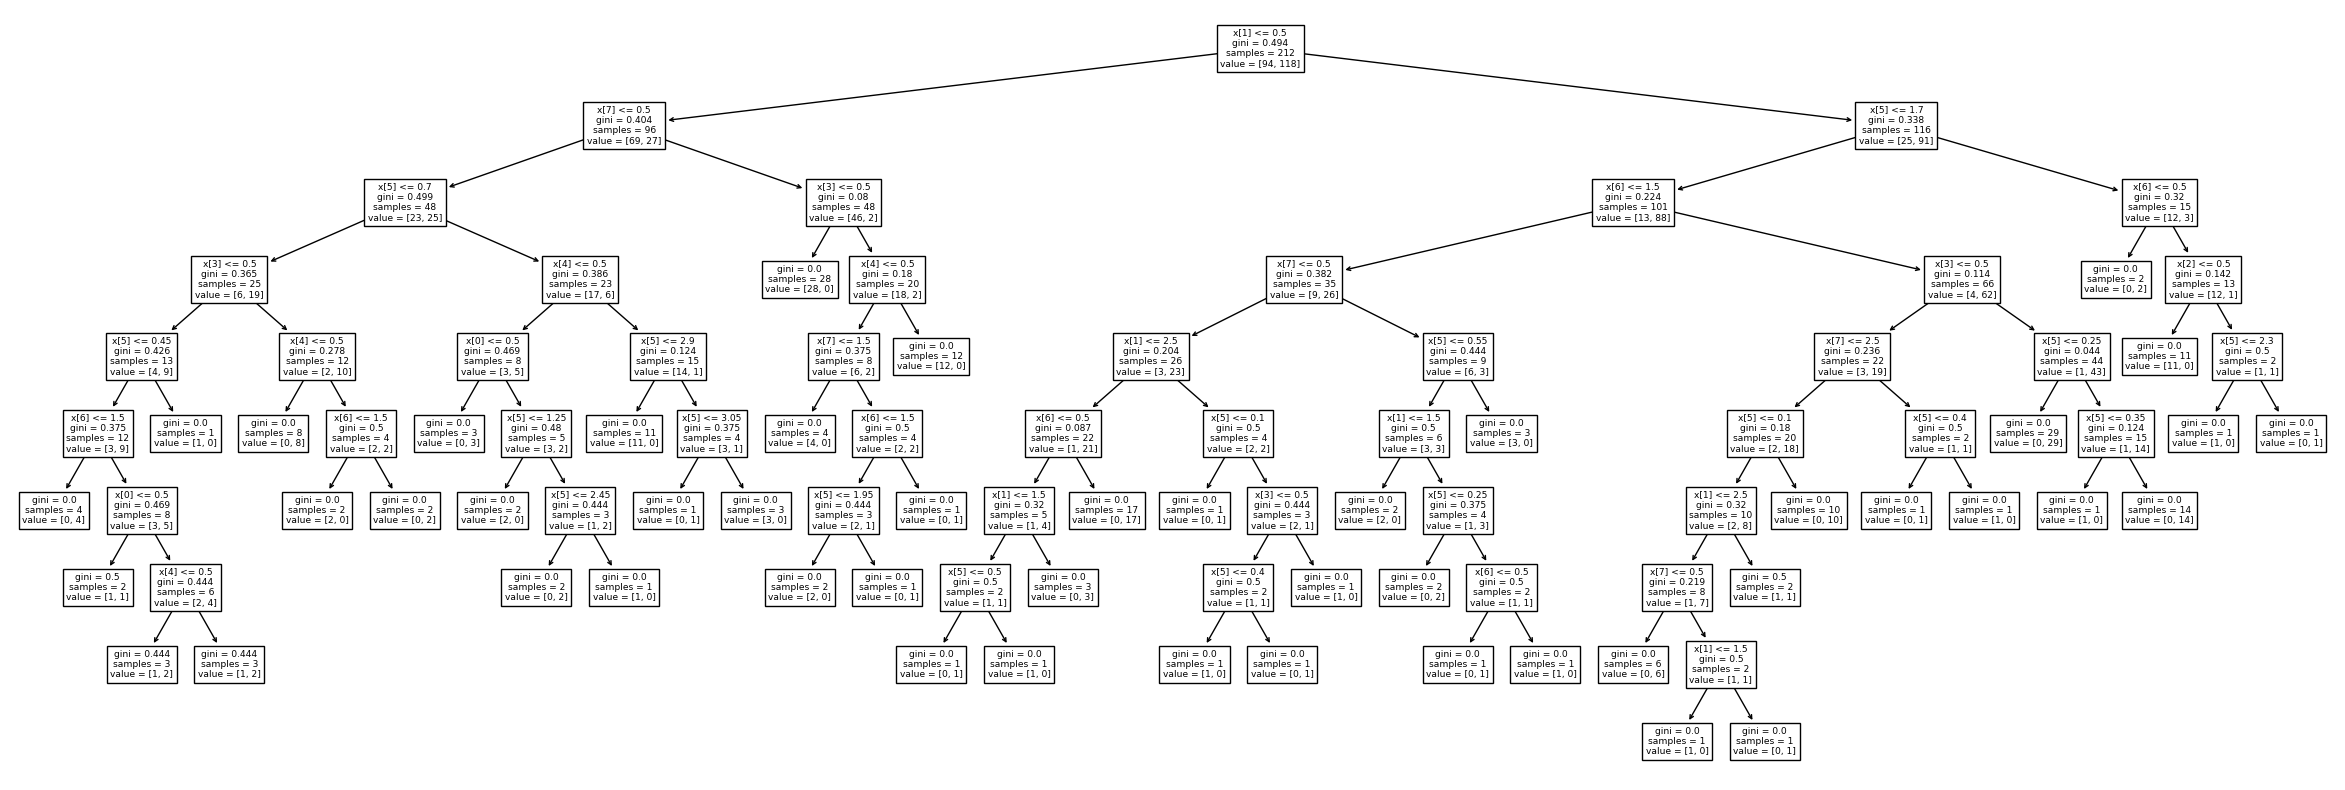

In [57]:
plt.figure(figsize=(30,10))
tree.plot_tree(dt)
plt.show()